In [1]:
import SpyDust.infrared as SpyIR
import SpyDust.util as SpyUtil
import numpy as np
import sys
import os
import warnings
from io import StringIO
from contextlib import contextmanager
import time
import matplotlib.pyplot as plt


# Suppress numpy runtime warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

# Context manager to suppress print statements
@contextmanager
def suppress_stdout():
    """Suppress stdout temporarily"""
    old_stdout = sys.stdout
    sys.stdout = StringIO()
    try:
        yield
    finally:
        sys.stdout = old_stdout


l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /Users/zzhang/Workspace/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored


/Users/zzhang/Workspace/SpyDust/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])


Gaunt factor stored


In [2]:
# Grain size range
a_min = 3.5e-8  # cm
a_max = 1e-6    # cm
Na = 30
a_tab = SpyUtil.makelogtab(a_min, a_max, Na)
print("Grain size table (in cm): \n", a_tab)


# Scaling factor (chi) range
chi_0 = 1e-5
chi_N = 1e10
Nchi = 30
# Calculating chi_min and chi_max as done in IDL
chi_min = np.exp(np.log(chi_0) - 1.0 / (2 * Nchi) * np.log(chi_N / chi_0))
chi_max = np.exp(np.log(chi_N) - 1.0 / (2 * Nchi) * np.log(chi_N / chi_0))
# Generating the chi_tab array
chi_tab = SpyUtil.makelogtab(chi_min, chi_max, Nchi)

print("Chi table: \n", chi_tab)

Grain size table (in cm): 
 [3.70112350e-08 4.13870662e-08 4.62802512e-08 5.17519564e-08
 5.78705804e-08 6.47126080e-08 7.23635673e-08 8.09190980e-08
 9.04861475e-08 1.01184307e-07 1.13147309e-07 1.26524694e-07
 1.41483684e-07 1.58211273e-07 1.76916561e-07 1.97833373e-07
 2.21223174e-07 2.47378348e-07 2.76625843e-07 3.09331264e-07
 3.45903440e-07 3.86799537e-07 4.32530773e-07 4.83668803e-07
 5.40852874e-07 6.04797805e-07 6.76302934e-07 7.56262101e-07
 8.45674825e-07 9.45658798e-07]
Chi table: 
 [1.00000000e-05 3.16227766e-05 1.00000000e-04 3.16227766e-04
 1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05 3.16227766e+05 1.00000000e+06 3.16227766e+06
 1.00000000e+07 3.16227766e+07 1.00000000e+08 3.16227766e+08
 1.00000000e+09 3.16227766e+09]


## Benchmark Different Grain Sizes

Test how computation time scales with grain size (keeping chi constant)

### 1. Smallest Chi value 

In [3]:
# Benchmark for different grain sizes (fixed chi)
# test_indices = [0, Na//4, Na//2, 3*Na//4, Na-1]  # Sample 5 grain sizes


# Add an extra large grain size for testing
# a_tab_extended = np.append(a_tab, a_max*10)
# Na_extended = len(a_tab_extended)

# test_indices = np.arange(Na_extended)  # Test all grain sizes including the extra large one
test_indices = np.arange(Na)  # Test all grain sizes
chi_fixed = chi_tab[0]  # Smallest chi value

timing_results_a_smallChi = []

print("Benchmarking different grain sizes (fixed chi = {:.2e})".format(chi_fixed))
print("="*70)

for idx in test_indices:
    a_test = a_tab[idx]
    
    start_time = time.time()
    with suppress_stdout():
        result = SpyIR.Benchmark_compute_FGIR_integrals(np.array([a_test]), np.array([chi_fixed]))
    end_time = time.time()
    
    elapsed = end_time - start_time
    timing_results_a_smallChi.append({
        'index': idx,
        'a': a_test,
        'chi': chi_fixed,
        'time': elapsed
    })
    
    print(f"a[{idx:2d}] = {a_test:.2e} cm  -->  {elapsed:.3f} seconds")


Benchmarking different grain sizes (fixed chi = 1.00e-05)
a[ 0] = 3.70e-08 cm  -->  1.096 seconds
a[ 0] = 3.70e-08 cm  -->  1.096 seconds
a[ 1] = 4.14e-08 cm  -->  1.072 seconds
a[ 1] = 4.14e-08 cm  -->  1.072 seconds
a[ 2] = 4.63e-08 cm  -->  1.074 seconds
a[ 2] = 4.63e-08 cm  -->  1.074 seconds
a[ 3] = 5.18e-08 cm  -->  1.093 seconds
a[ 3] = 5.18e-08 cm  -->  1.093 seconds
a[ 4] = 5.79e-08 cm  -->  1.088 seconds
a[ 4] = 5.79e-08 cm  -->  1.088 seconds
a[ 5] = 6.47e-08 cm  -->  1.073 seconds
a[ 5] = 6.47e-08 cm  -->  1.073 seconds
a[ 6] = 7.24e-08 cm  -->  1.065 seconds
a[ 6] = 7.24e-08 cm  -->  1.065 seconds
a[ 7] = 8.09e-08 cm  -->  1.091 seconds
a[ 7] = 8.09e-08 cm  -->  1.091 seconds
a[ 8] = 9.05e-08 cm  -->  1.071 seconds
a[ 8] = 9.05e-08 cm  -->  1.071 seconds
a[ 9] = 1.01e-07 cm  -->  1.562 seconds
a[ 9] = 1.01e-07 cm  -->  1.562 seconds
a[10] = 1.13e-07 cm  -->  1.080 seconds
a[10] = 1.13e-07 cm  -->  1.080 seconds
a[11] = 1.27e-07 cm  -->  1.069 seconds
a[11] = 1.27e-07 cm  -

Sufficiently large grain size

In [4]:
start_time = time.time()
with suppress_stdout():
    result = SpyIR.Benchmark_compute_FGIR_integrals(np.array([a_tab[-1]*10]), np.array([chi_fixed]))
end_time = time.time()

elapsed = end_time - start_time

print(f"a= {a_tab[-1]*10:.2e} cm  -->  {elapsed:.3f} seconds")

a= 9.46e-06 cm  -->  1035.686 seconds


### 2. Largest Chi value 

In [ ]:
# Benchmark for different grain sizes (fixed chi)
# test_indices = [0, Na//4, Na//2, 3*Na//4, Na-1]  # Sample 5 grain sizes

# Add an extra large grain size for testing
a_tab_extended = np.append(a_tab, a_max*20)
Na_extended = len(a_tab_extended)

test_indices = np.arange(Na_extended)  # Test all grain sizes including the extra large one
chi_fixed = chi_tab[-1]  # Large chi value

timing_results_a_largeChi = []

print("Benchmarking different grain sizes (fixed chi = {:.2e})".format(chi_fixed))
print("="*70)

for idx in test_indices:
    a_test = a_tab_extended[idx]
    
    start_time = time.time()
    with suppress_stdout():
        result = SpyIR.Benchmark_compute_FGIR_integrals(np.array([a_test]), np.array([chi_fixed]))
    end_time = time.time()
    
    elapsed = end_time - start_time
    timing_results_a_largeChi.append({
        'index': idx,
        'a': a_test,
        'chi': chi_fixed,
        'time': elapsed
    })
    
    print(f"a[{idx:2d}] = {a_test:.2e} cm  -->  {elapsed:.3f} seconds")

In [ ]:
start_time = time.time()
with suppress_stdout():
    result = SpyIR.Benchmark_compute_FGIR_integrals(np.array([a_tab[-1]*10]), np.array([chi_fixed]))
end_time = time.time()

elapsed = end_time - start_time

print(f"a= {a_tab[-1]*10:.2e} cm  -->  {elapsed:.3f} seconds")

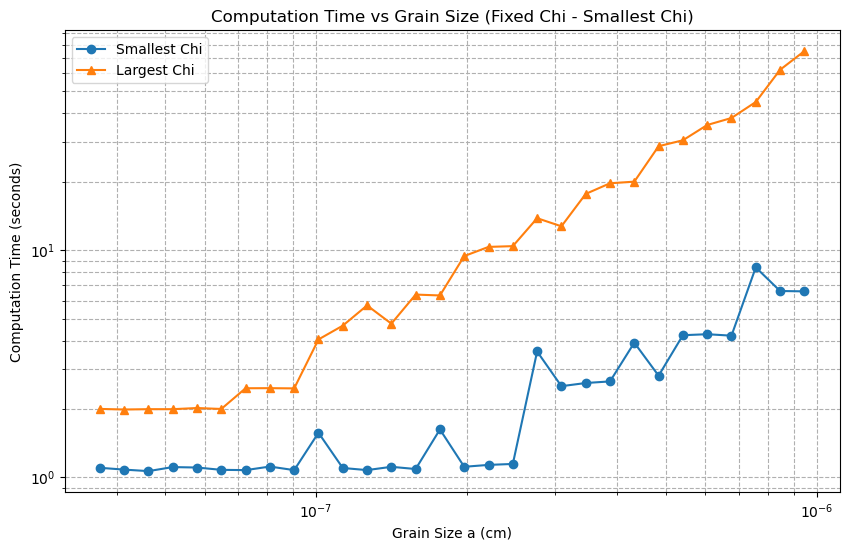

In [ ]:

# print("\nAverage time: {:.3f} seconds".format(np.mean([r['time'] for r in timing_results_a_smallChi])))
plt.figure(figsize=(10, 6))
plt.plot([r['a'] for r in timing_results_a_smallChi], [r['time'] for r in timing_results_a_smallChi], marker='o', label='Smallest Chi')
plt.plot([r['a'] for r in timing_results_a_largeChi], [r['time'] for r in timing_results_a_largeChi], marker='^', label='Largest Chi')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grain Size a (cm)')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Grain Size (Fixed $Chi$ - Smallest $Chi$)')
plt.grid(True, which="both", ls="--")
plt.savefig("benchmark_infrared_different_sizes.pdf", dpi=300)
plt.show()

## Benchmark Different Chi Values

Test how computation time scales with radiation field intensity (keeping grain size constant)


### 1. Smallest grain size

In [17]:
# Benchmark for different chi values (fixed grain size)

test_indices_chi = np.arange(Nchi)  # Test all chi values

a_fixed = a_tab[0]  # Smallest grain size

timing_results_chi_small_a = []

print("Benchmarking different chi values (fixed a = {:.2e} cm)".format(a_fixed))
print("="*70)

for idx in test_indices_chi:
    chi_test = chi_tab[idx]
    
    start_time = time.time()
    with suppress_stdout():
        result = SpyIR.Benchmark_compute_FGIR_integrals(np.array([a_fixed]), np.array([chi_test]))
    end_time = time.time()
    
    elapsed = end_time - start_time
    timing_results_chi_small_a.append({
        'index': idx,
        'a': a_fixed,
        'chi': chi_test,
        'time': elapsed
    })
    
    print(f"chi[{idx:2d}] = {chi_test:.2e}  -->  {elapsed:.3f} seconds")



Benchmarking different chi values (fixed a = 3.70e-08 cm)
chi[ 0] = 1.00e-05  -->  1.068 seconds
chi[ 0] = 1.00e-05  -->  1.068 seconds
chi[ 1] = 3.16e-05  -->  1.069 seconds
chi[ 1] = 3.16e-05  -->  1.069 seconds
chi[ 2] = 1.00e-04  -->  1.052 seconds
chi[ 2] = 1.00e-04  -->  1.052 seconds
chi[ 3] = 3.16e-04  -->  1.062 seconds
chi[ 3] = 3.16e-04  -->  1.062 seconds
chi[ 4] = 1.00e-03  -->  1.056 seconds
chi[ 4] = 1.00e-03  -->  1.056 seconds
chi[ 5] = 3.16e-03  -->  1.057 seconds
chi[ 5] = 3.16e-03  -->  1.057 seconds
chi[ 6] = 1.00e-02  -->  1.060 seconds
chi[ 6] = 1.00e-02  -->  1.060 seconds
chi[ 7] = 3.16e-02  -->  1.071 seconds
chi[ 7] = 3.16e-02  -->  1.071 seconds
chi[ 8] = 1.00e-01  -->  1.058 seconds
chi[ 8] = 1.00e-01  -->  1.058 seconds
chi[ 9] = 3.16e-01  -->  1.062 seconds
chi[ 9] = 3.16e-01  -->  1.062 seconds
chi[10] = 1.00e+00  -->  1.072 seconds
chi[10] = 1.00e+00  -->  1.072 seconds
chi[11] = 3.16e+00  -->  1.061 seconds
chi[11] = 3.16e+00  -->  1.061 seconds
chi[12

### 2. Largest grain size

In [20]:
# Benchmark for different chi values (fixed grain size)

test_indices_chi = np.arange(Nchi)  # Test all chi values

a_fixed = a_tab[-1]  # largest grain size

timing_results_chi_large_a = []

print("Benchmarking different chi values (fixed a = {:.2e} cm)".format(a_fixed))
print("="*70)

for idx in test_indices_chi:
    chi_test = chi_tab[idx]
    
    start_time = time.time()
    with suppress_stdout():
        result = SpyIR.Benchmark_compute_FGIR_integrals(np.array([a_fixed]), np.array([chi_test]))
    end_time = time.time()
    
    elapsed = end_time - start_time
    timing_results_chi_large_a.append({
        'index': idx,
        'a': a_fixed,
        'chi': chi_test,
        'time': elapsed
    })
    
    print(f"chi[{idx:2d}] = {chi_test:.2e}  -->  {elapsed:.3f} seconds")



Benchmarking different chi values (fixed a = 9.46e-07 cm)
chi[ 0] = 1.00e-05  -->  6.696 seconds
chi[ 0] = 1.00e-05  -->  6.696 seconds
chi[ 1] = 3.16e-05  -->  9.747 seconds
chi[ 1] = 3.16e-05  -->  9.747 seconds
chi[ 2] = 1.00e-04  -->  9.582 seconds
chi[ 2] = 1.00e-04  -->  9.582 seconds
chi[ 3] = 3.16e-04  -->  9.564 seconds
chi[ 3] = 3.16e-04  -->  9.564 seconds
chi[ 4] = 1.00e-03  -->  9.498 seconds
chi[ 4] = 1.00e-03  -->  9.498 seconds
chi[ 5] = 3.16e-03  -->  9.497 seconds
chi[ 5] = 3.16e-03  -->  9.497 seconds
chi[ 6] = 1.00e-02  -->  9.518 seconds
chi[ 6] = 1.00e-02  -->  9.518 seconds
chi[ 7] = 3.16e-02  -->  9.494 seconds
chi[ 7] = 3.16e-02  -->  9.494 seconds
chi[ 8] = 1.00e-01  -->  9.473 seconds
chi[ 8] = 1.00e-01  -->  9.473 seconds
chi[ 9] = 3.16e-01  -->  14.982 seconds
chi[ 9] = 3.16e-01  -->  14.982 seconds
chi[10] = 1.00e+00  -->  15.041 seconds
chi[10] = 1.00e+00  -->  15.041 seconds
chi[11] = 3.16e+00  -->  14.960 seconds
chi[11] = 3.16e+00  -->  14.960 seconds


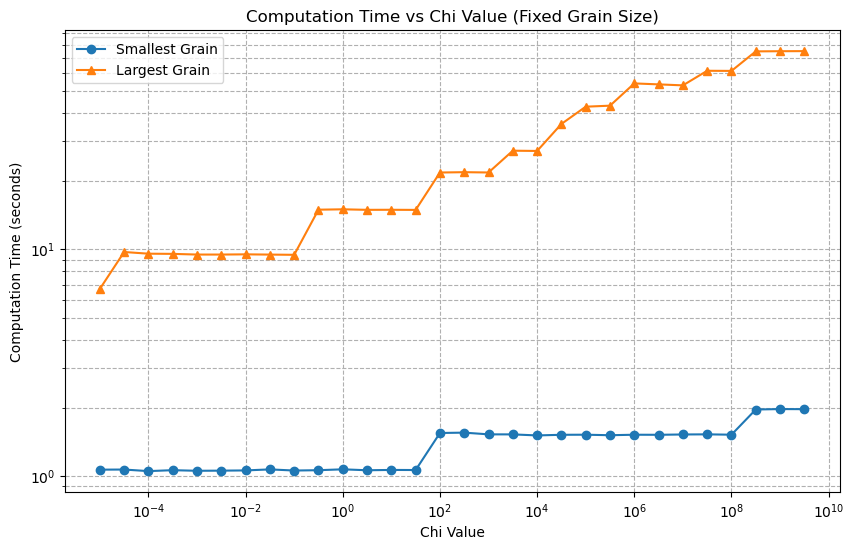

In [21]:
plt.figure(figsize=(10, 6))
plt.plot([r['chi'] for r in timing_results_chi_small_a], [r['time'] for r in timing_results_chi_small_a], marker='o', label='Smallest Grain')
plt.plot([r['chi'] for r in timing_results_chi_large_a], [r['time'] for r in timing_results_chi_large_a], marker='^', label='Largest Grain')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Chi Value')
plt.ylabel('Computation Time (seconds)')
plt.title('Computation Time vs Chi Value (Fixed Grain Size)')
plt.grid(True, which="both", ls="--")
plt.savefig("benchmark_infrared_different_chi.pdf", dpi=300)
plt.show()


## Comprehensive Grid Benchmark

Test a full grid of grain sizes and chi values (Warning: This may take a while!)


In [22]:
# Full grid benchmark (use smaller sample for speed)
n_samples_a = 5
n_samples_chi = 5

a_sample_indices = np.linspace(0, Na-1, n_samples_a, dtype=int)
chi_sample_indices = np.linspace(0, Nchi-1, n_samples_chi, dtype=int)

timing_grid = np.zeros((n_samples_a, n_samples_chi))

print(f"Running comprehensive benchmark: {n_samples_a} grain sizes × {n_samples_chi} chi values")
print("="*70)

total_start = time.time()

for i, ia in enumerate(a_sample_indices):
    a_test = a_tab[ia]
    for j, ichi in enumerate(chi_sample_indices):
        chi_test = chi_tab[ichi]
        
        start_time = time.time()
        with suppress_stdout():
            result = SpyIR.Benchmark_compute_FGIR_integrals(np.array([a_test]), np.array([chi_test]))
        end_time = time.time()
        
        elapsed = end_time - start_time
        timing_grid[i, j] = elapsed
        
        print(f"[{i+1:2d}/{n_samples_a}, {j+1:2d}/{n_samples_chi}] a={a_test:.2e}, chi={chi_test:.2e}  -->  {elapsed:.3f}s")

total_time = time.time() - total_start

print("="*70)
print(f"\nTotal benchmark time: {total_time:.2f} seconds")
print(f"Average time per calculation: {timing_grid.mean():.3f} seconds")
print(f"Min time: {timing_grid.min():.3f} seconds")
print(f"Max time: {timing_grid.max():.3f} seconds")


Running comprehensive benchmark: 5 grain sizes × 5 chi values
[ 1/5,  1/5] a=3.70e-08, chi=1.00e-05  -->  1.088s
[ 1/5,  1/5] a=3.70e-08, chi=1.00e-05  -->  1.088s
[ 1/5,  2/5] a=3.70e-08, chi=3.16e-02  -->  1.076s
[ 1/5,  2/5] a=3.70e-08, chi=3.16e-02  -->  1.076s
[ 1/5,  3/5] a=3.70e-08, chi=1.00e+02  -->  1.597s
[ 1/5,  3/5] a=3.70e-08, chi=1.00e+02  -->  1.597s
[ 1/5,  4/5] a=3.70e-08, chi=3.16e+05  -->  1.553s
[ 1/5,  4/5] a=3.70e-08, chi=3.16e+05  -->  1.553s
[ 1/5,  5/5] a=3.70e-08, chi=3.16e+09  -->  2.014s
[ 1/5,  5/5] a=3.70e-08, chi=3.16e+09  -->  2.014s
[ 2/5,  1/5] a=8.09e-08, chi=1.00e-05  -->  1.092s
[ 2/5,  1/5] a=8.09e-08, chi=1.00e-05  -->  1.092s
[ 2/5,  2/5] a=8.09e-08, chi=3.16e-02  -->  1.083s
[ 2/5,  2/5] a=8.09e-08, chi=3.16e-02  -->  1.083s
[ 2/5,  3/5] a=8.09e-08, chi=1.00e+02  -->  1.564s
[ 2/5,  3/5] a=8.09e-08, chi=1.00e+02  -->  1.564s
[ 2/5,  4/5] a=8.09e-08, chi=3.16e+05  -->  2.056s
[ 2/5,  4/5] a=8.09e-08, chi=3.16e+05  -->  2.056s
[ 2/5,  5/5] a=8.09e

## Visualize Benchmark Results



Plot saved as 'benchmark_results.png'


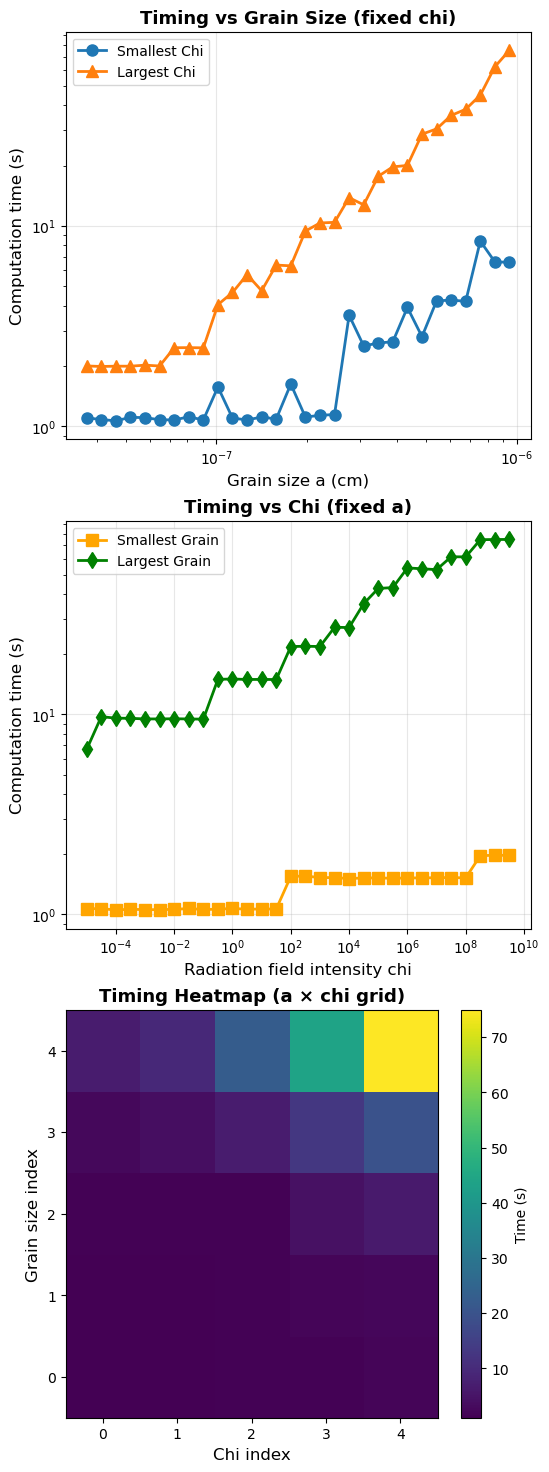

In [31]:
import matplotlib.pyplot as plt

# Create figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 18))

# 1. Timing vs grain size
ax = axes[0]
a_values = [r['a'] for r in timing_results_a_smallChi]
times_a = [r['time'] for r in timing_results_a_smallChi]
ax.plot(a_values, times_a, 'o-', linewidth=2, markersize=8, label='Smallest Chi')
a_values = [r['a'] for r in timing_results_a_largeChi]
times_a = [r['time'] for r in timing_results_a_largeChi]
ax.plot(a_values, times_a, '^-', linewidth=2, markersize=8, label='Largest Chi')
ax.legend()
ax.set_xlabel('Grain size a (cm)', fontsize=12)
ax.set_ylabel('Computation time (s)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Timing vs Grain Size (fixed chi)', fontsize=13, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

# 2. Timing vs chi
ax = axes[1]
chi_values = [r['chi'] for r in timing_results_chi_small_a]
times_chi = [r['time'] for r in timing_results_chi_small_a]
ax.plot(chi_values, times_chi, 's-', linewidth=2, markersize=8, color='orange', label='Smallest Grain')
chi_values = [r['chi'] for r in timing_results_chi_large_a]
times_chi = [r['time'] for r in timing_results_chi_large_a]
ax.plot(chi_values, times_chi, 'd-', linewidth=2, markersize=8, color='green', label='Largest Grain')
ax.legend()
ax.set_xlabel('Radiation field intensity chi', fontsize=12)
ax.set_ylabel('Computation time (s)', fontsize=12)
ax.set_yscale('log')
ax.set_yscale('log')
ax.set_title('Timing vs Chi (fixed a)', fontsize=13, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

# 3. 2D heatmap of timing grid
ax = axes[2]
im = ax.imshow(timing_grid, aspect='auto', origin='lower', cmap='viridis')
ax.set_xlabel('Chi index', fontsize=12)
ax.set_ylabel('Grain size index', fontsize=12)
ax.set_title('Timing Heatmap (a × chi grid)', fontsize=13, fontweight='bold')
plt.colorbar(im, ax=ax, label='Time (s)')


print("\nPlot saved as 'benchmark_results.png'")


**Note**:

- 1. The computational cost grows exponentially with respect to both the grain size and the radiation field intensity χ.
- 2. The earlier remark that ``a 30 × 30 grid takes 62 minutes, which seems not ridiculously slow'' is largely due to the logarithmic sampling — sampling uniformly in log space effectively provides denser coverage for smaller grains.